# VAMPIRE WORKFLOW

## Purpose: To split images into quadrants, pick training and testing image sets, and in the future run the full VAMPIRE workflow

Edited: October 28th, 2021 to specifically refer to Phuong's BEV Treatment data and split them for VAMPIRE

*Step 1: Import necessary packages*

In [61]:
import shutil, os

from glob import glob

import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt
from PIL import Image
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from skimage.segmentation import clear_border
import skimage
import tifffile as tiff
import vampire
from os.path import isfile, join

%matplotlib inline

*Step 2: User Inputs*

Manual Step:
Beginning with already segmented images saved as .npy arrays from the "2_Phuong_collab_segmentation.ipynb" Jupyter Notebook also within this folder. 

Not a blind study. 

Images already exist in a folder tree based on the overall slice treatment time and then the group subset for example:

48_hr_exposure_time > (1) BEV_treatment (2) healthy_control (3) OGD_control

In [2]:
#file names should be in the current working directory
folder_location = '/Users/nelsschimek/Documents/nancelab/Data/caffeine'

file_type_init = '.npy'

slice_number = 4
random_state_num = 3

*Step 5: Getting the List of Images to Split*

In [ ]:
my_path = '/Users/nelsschimek/Documents/nancelab/Data/caffeine/cortex/'
file_list = [f for f in os.listdir(my_path) if isfile(join(my_path, f)) and '.tif' in f]
file_list

['40x_Plate11_Slice202_Ctx_Image1_102224_li_thresh_quad4.tif',
 '40x_Plate11_Slice157_Ctx_Image2_101924_li_thresh_quad3.tif',
 '40x_Plate3_Slice40_Ctx_Image2_092024_li_thresh_quad2.tif',
 '40x_Plate8_Slice130_Ctx_Image1_100724_li_thresh_quad4.tif',
 '40x_Plate3_Slice40_Ctx_Image2_092024_li_thresh_quad3.tif',
 '40x_Plate8_Slice132_Ctx_Image1_100724_li_thresh_quad4.tif',
 '40x_Plate11_Slice157_Ctx_Image2_101924_li_thresh_quad2.tif',
 '40x_Plate7_Slice126_Ctx_Image1_101824_li_thresh_quad4.tif',
 '40x_Plate9_Slice229_Ctx_Image2_102324_li_thresh_quad4.tif',
 '40x_Plate3_Slice40_Ctx_Image2_092024_li_thresh_quad1.tif',
 '40x_Plate7_Slice128_Ctx_Image1_101924_li_thresh_quad4.tif',
 '40x_Plate11_Slice157_Ctx_Image2_101924_li_thresh_quad1.tif',
 '40x_Plate11_Slice202_Ctx_Image1_102224_li_thresh_quad2.tif',
 '40x_Plate7_Slice126_Ctx_Image1_101824_li_thresh_quad3.tif',
 '40x_Plate8_Slice132_Ctx_Image1_100724_li_thresh_quad3.tif',
 '40x_Plate9_Slice229_Ctx_Image2_102324_li_thresh_quad1.tif',
 '40x_

In [ ]:
for file in file_list:

    new_array = np.load('/Users/nelsschimek/Documents/nancelab/Data/caffeine/cortex/test/' + file)

    colored_array = new_array.astype(np.uint8)*255

    output_path = '/Users/nelsschimek/Documents/nancelab/Data/caffeine/cortex/test/' + file[:-4] + '.tif'

    tiff.imwrite(output_path, colored_array)


*Step 4: Choose training and testing data sets*

In [ ]:
# ttsplit_list_files = []
# for folders in folder_list:
#     arr = os.listdir(str(folder_location + '/' + folders))
#     subfolder_list = np.asarray(arr)
#     subfolder_list = [ x for x in subfolder_list if "DS" not in x]
#     subfolder_list = [ x for x in subfolder_list if ".npy" not in x]
#     for subfolders in subfolder_list:
#         print(subfolders)
#         arr = os.listdir(str(folder_location + '/' + folders + '/' + subfolders))
#         files_list = np.asarray(arr)
#         files_list = [ x for x in files_list if "DS" not in x]
#         files_list = [ x for x in files_list if "quad" in x]
#         X_train, X_test= train_test_split(files_list, test_size=0.20, random_state=random_state_num)
#         for files in files_list:
#             if files in X_train[:]:
#                 shutil.move(str(folder_location + '/' + folders + '/' + subfolders + '/' + files), '/Users/nelsschimek/Documents/nancelab/vampire_work/caffeine/train')
#             else:
#                 shutil.move(str(folder_location + '/' + folders + '/' + subfolders + '/' + files), '/Users/nelsschimek/Documents/nancelab/vampire_work/caffeine/test')

treatment_B
treatment_E
treatment_D
treatment_C
treatment_A


*Step Y: Renaming the data sets according to VAMPIRE naming mechanism*

In [24]:
arr_train1 = os.listdir('/Users/nelsschimek/Documents/nancelab/Data/caffeine/cortex/train')
file_list_train1 = np.asarray(arr_train1)
file_list_train1 = [ x for x in file_list_train1 if "DS" not in x]
file_list_train1

['40x_Plate5_Slice86_Ctx_Image1_100224_li_thresh_quad2.npy',
 '40x_Plate12_Slice174_Ctx_Image1_102324_li_thresh_quad4.npy',
 '40x_Plate1_Slice18_Ctx_Image2_080724_li_thresh_quad2.npy',
 '40x_Plate12_Slice167_Ctx_Image3_102324_li_thresh_quad1.npy',
 '40x_Plate5_Slice85_Ctx_Image1_100224_li_thresh_quad3.npy',
 '40x_Plate4_Slice74_Ctx_Image3_093024_li_thresh_quad3.npy',
 '40x_Plate11_Slice160_Ctx_Image3_102224_li_thresh_quad1.npy',
 '40x_Plate6_Slice117_Ctx_Image3_100324_li_thresh_quad4.npy',
 '40x_Plate4_Slice80_Ctx_Image2_093024_li_thresh_quad3.npy',
 '40x_Plate13_Slice180_Ctx_Image2_102324_li_thresh_quad2.npy',
 '40x_Plate9_Slice178_Ctx_Image1_101724_li_thresh_quad1.npy',
 '40x_Plate1_Slice23_Ctx_Image1_080724_li_thresh_quad4.npy',
 '40x_Plate3_Slice61_Ctx_Image3_092624_li_thresh_quad1.npy',
 '40x_Plate1_Slice15_Ctx_Image1_080524_li_thresh_quad3.npy',
 '40x_Plate8_Slice136_Ctx_Image3_100724_li_thresh_quad1.npy',
 '40x_Plate12_Slice175_Ctx_Image1_102324_li_thresh_quad4.npy',
 '40x_Plate

In [11]:
im_number= 1
for names in file_list_train1:
    print(names)
    
    file_location = str('/Users/nelsschimek/Documents/nancelab/Data/caffeine/cortex/train/' + names)
    array = np.load(file_location)
    im = Image.fromarray(array)
    
    if im_number < 10:
        im.save(str('/Users/nelsschimek/Documents/nancelab/Data/caffeine/cortex/train/' + names[:-4] + 'xy' + '0' + str(im_number) + 'c1.png'))
        
    else:
        im.save(str('/Users/nelsschimek/Documents/nancelab/Data/caffeine/cortex/train/' + names[:-4] + 'xy' + str(im_number) + 'c1.png'))
        
    
    im_number +=1

NameError: name 'file_list_train1' is not defined

*Splitting the test group into the appropriate conditions*

In [31]:
im_number= 1
for names in file_list_test:
    print(names)
    
    file_location = str('/Users/nelsschimek/Documents/nancelab/vampire_work/caffeine/test/' + names)
    array = np.load(file_location)
    im = Image.fromarray(array)
    
    if im_number < 10:
        im.save(str('/Users/nelsschimek/Documents/nancelab/vampire_work/caffeine/test/' + names[:-4] + 'xy' + '0' + str(im_number) + 'c1.png'))
        
    else:
        im.save(str('/Users/nelsschimek/Documents/nancelab/vampire_work/caffeine/test/' + names[:-4] + 'xy' + str(im_number) + 'c1.png'))
        
    
    im_number +=1

40x_Plate1_Slice15_Ctx_Image1_080524_li_thresh_quad3.npy
40x_Plate12_Slice175_Ctx_Image1_102324_li_thresh_quad4.npy
40x_Plate7_Slice128_Ctx_Image3_101924_li_thresh_quad1.npy
40x_Plate8_Slice21_Ctx_Image2_100724_li_thresh_quad2.npy
40x_Plate11_Slice158_Ctx_Image3_101924_li_thresh_quad3.npy
40x_Plate8_Slice130_Ctx_Image3_100724_li_thresh_quad3.npy
40x_Plate13_Slice209_Ctx_Image2_102324_li_thresh_quad2.npy
40x_Plate8_Slice130_Ctx_Image3_100724_li_thresh_quad2.npy
40x_Plate8_Slice21_Ctx_Image2_100724_li_thresh_quad3.npy
40x_Plate10_Slice257_Ctx_Image2_102324_li_thresh_quad4.npy
40x_Plate1_Slice15_Ctx_Image1_080524_li_thresh_quad2.npy
40x_Plate8_Slice132_Ctx_Image3_100724_li_thresh_quad3.npy
40x_Plate9_Slice164_Ctx_Image2_101024_li_thresh_quad4.npy
40x_Plate5_Slice86_Ctx_Image1_100224_li_thresh_quad3.npy
40x_Plate7_Slice126_Ctx_Image3_101824_li_thresh_quad1.npy
40x_Plate3_Slice60_Ctx_Image1_092324_li_thresh_quad3.npy
40x_Plate7_Slice127_Ctx_Image1_101724_li_thresh_quad4.npy
40x_Plate13_Slic

# Creating the information necessary for VAMPIRE Analysis

In [6]:
treatments = ['treatment_A', 'treatment_B', 'treatment_C', 'treatment_D', 'treatment_E']
groups = ['cortex']

In [39]:
image_set_path = '/Users/nelsschimek/Documents/nancelab/Data/caffeine/cortex/train/tifs'

vampire.extraction.extract_properties(image_set_path)

Contour and properties data already exist in path: /Users/nelsschimek/Documents/nancelab/Data/caffeine/cortex/train/tifs
Contour and properties data already exist in path: /Users/nelsschimek/Documents/nancelab/Data/caffeine/cortex/train/tifs


,filename,image_id,label,centroid-y,centroid-x,area,bbox_area,convex_area,filled_area,perimeter,...,major_axis_length,minor_axis_length,orientation,euler_number,eccentricity,solidity,extent,raw_contour,circularity,aspect_ratio
0,40x_Plate5_Slice85_Ctx_Image3_100224_li_thresh...,0,255,234.169034,268.589921,43299.0,251496.0,226308.0,43299.0,14084.162220,...,556.929396,479.174926,1.166174,67,0.509641,0.191328,0.172166,"[[117, 118, 117, 118, 117, 118, 118, 119, 120,...",0.002743,1.162267
1,40x_Plate4_Slice79_Ctx_Image2_093024_li_thresh...,1,255,265.747473,280.603309,42736.0,246506.0,233137.0,42736.0,14616.377516,...,557.590470,481.431550,-0.068989,88,0.504496,0.183309,0.173367,"[[202, 202, 202, 203, 204, 205, 204, 205, 206,...",0.002514,1.158193
2,40x_Plate12_Slice174_Ctx_Image3_102324_li_thre...,2,255,149.930015,204.940862,6730.0,145530.0,104770.0,6730.0,2726.307971,...,445.779740,348.241083,-1.148281,29,0.624287,0.064236,0.046245,"[[92, 93, 93, 94, 95, 96, 97, 98, 97, 97, 98, ...",0.011378,1.280089
3,40x_Plate12_Slice166_Ctx_Image2_102224_li_thre...,3,255,236.563070,200.902304,15364.0,232068.0,176673.0,15364.0,3397.825827,...,539.750963,414.899004,-0.429237,27,0.639626,0.086963,0.066205,"[[417, 418, 419, 420, 419, 420, 421, 422, 422,...",0.016723,1.300921
4,40x_Plate4_Slice74_Ctx_Image1_093024_li_thresh...,4,255,260.606681,234.435279,45472.0,252494.0,221015.0,45472.0,10958.676580,...,510.114644,502.012077,-0.412692,51,0.177526,0.205742,0.180091,"[[497, 498, 497, 496, 497, 496, 495, 495, 496,...",0.004758,1.016140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,40x_Plate3_Slice61_Ctx_Image3_092624_li_thresh...,415,255,216.548491,236.549973,7424.0,200760.0,149610.0,7424.0,2723.875467,...,627.669210,299.206256,0.609832,22,0.879069,0.049622,0.036979,"[[294, 294, 294, 294, 294, 295, 296, 296, 295,...",0.012574,2.097781
416,40x_Plate11_Slice161_Ctx_Image3_102224_li_thre...,416,255,190.954312,275.930154,7989.0,228420.0,198059.0,7989.0,2738.929291,...,672.970323,529.299380,0.195077,31,0.617575,0.040336,0.034975,"[[397, 397, 398, 399, 400, 401, 402, 403, 404,...",0.013383,1.271436
417,40x_Plate11_Slice158_Ctx_Image3_101924_li_thre...,417,255,267.073490,212.156051,35828.0,250444.0,221447.0,35828.0,9640.316011,...,541.708124,429.437355,1.103581,53,0.609551,0.161790,0.143058,"[[478, 479, 480, 481, 482, 483, 482, 482, 481,...",0.004845,1.261437
418,40x_Plate13_Slice209_Ctx_Image2_102324_li_thre...,418,255,298.921887,238.321937,12021.0,224601.0,156887.0,12021.0,3275.605481,...,736.964969,281.541230,-0.753471,22,0.924151,0.076622,0.053522,"[[73, 74, 73, 74, 75, 76, 76, 77, 78, 78, 79, ...",0.014079,2.617609


In [49]:
build_info_df = pd.DataFrame({
    'img_set_path': [image_set_path],
    'output_path': [image_set_path],
    'model_name': ['li'],
    'num_points': [50],
    'num_clusters': [5],
    'num_pc': [np.nan]
})

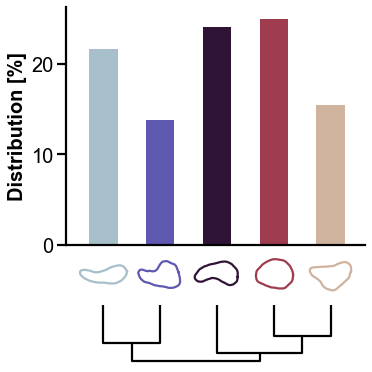

In [50]:
vampire.quickstart.fit_models(build_info_df)

In [51]:
model_path = os.path.join('/Users/nelsschimek/Documents/nancelab/Data/caffeine/cortex/train/tifs', 'model_li_(50_5_34)__.pickle')
vampire_model = vampire.util.read_pickle(model_path)

In [52]:
apply_info_df = pd.DataFrame({
    'img_set_path': ['/Users/nelsschimek/Documents/nancelab/Data/caffeine/cortex/test'],
    'model_path': ['/Users/nelsschimek/Documents/nancelab/Data/caffeine/cortex/train/tifs/model_li_(50_5_34)__.pickle'],
    'output_path': ['/Users/nelsschimek/Documents/nancelab/Data/caffeine/cortex/test'],
    'img_set_name': ['li'],
})

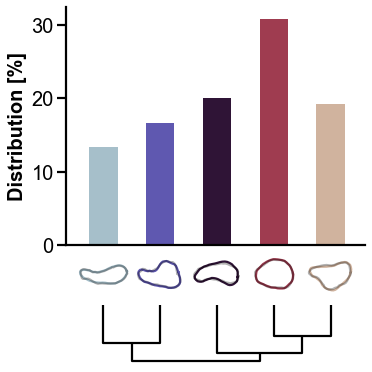

In [54]:
vampire.quickstart.transform_datasets(apply_info_df)

In [56]:
properties_path = os.path.join('/Users/nelsschimek/Documents/nancelab/Data/caffeine/cortex/test/', 'apply-properties_li_on_li_(50_5_34)__.pickle')
properties_df = vampire.util.read_pickle(properties_path)
properties_df

,filename,image_id,label,centroid-y,centroid-x,area,bbox_area,convex_area,filled_area,perimeter,...,eccentricity,solidity,extent,raw_contour,circularity,aspect_ratio,normalized_contour,cluster_id,plot_cluster_id,distance_to_centroid
0,40x_Plate11_Slice202_Ctx_Image1_102224_li_thre...,0,255,221.785632,274.027433,18263.0,254518.0,216998.0,18263.0,7151.640508,...,0.314039,0.084162,0.071755,"[[440, 440, 441, 442, 442, 443, 444, 444, 443,...",0.004487,1.053286,"[1.4660298594311174, 1.260068922067187, 1.2634...",1,2,0.950993
1,40x_Plate11_Slice157_Ctx_Image2_101924_li_thre...,1,255,226.820487,285.983883,23391.0,255528.0,235986.0,23391.0,7751.862946,...,0.315504,0.099120,0.091540,"[[503, 503, 503, 504, 505, 505, 504, 504, 505,...",0.004892,1.053825,"[1.32340315385219, 1.1251414583882444, 0.85349...",1,2,0.874058
2,40x_Plate3_Slice40_Ctx_Image2_092024_li_thresh...,2,255,219.152485,244.907121,17582.0,251446.0,216997.0,17582.0,4525.831058,...,0.553905,0.081024,0.069924,"[[392, 392, 393, 394, 394, 394, 395, 396, 397,...",0.010787,1.201086,"[1.3890273435209752, 1.2453128887310125, 1.448...",4,5,0.820243
3,40x_Plate8_Slice130_Ctx_Image1_100724_li_thres...,3,255,189.216610,244.350345,11463.0,241868.0,202830.0,11463.0,5225.063597,...,0.456058,0.056515,0.047394,"[[343, 343, 343, 344, 344, 345, 346, 347, 346,...",0.005276,1.123659,"[1.1865088021761558, 1.3164144701114762, 1.178...",2,3,0.807234
4,40x_Plate3_Slice40_Ctx_Image2_092024_li_thresh...,4,255,293.526425,231.071481,8212.0,243512.0,201547.0,8212.0,2787.711037,...,0.791115,0.040745,0.033723,"[[16, 17, 18, 17, 16, 16, 17, 16, 16, 15, 16, ...",0.013279,1.634875,"[1.1904044633150987, 1.1545885687352389, 1.141...",2,3,0.900064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,40x_Plate7_Slice126_Ctx_Image3_101824_li_thres...,115,255,272.663058,320.003989,10530.0,231345.0,191805.0,10530.0,3513.530409,...,0.358139,0.054900,0.045516,"[[211, 212, 213, 214, 215, 216, 217, 218, 219,...",0.010719,1.071044,"[1.0820088784465471, 0.9258447214523081, 0.966...",3,4,0.842576
116,40x_Plate11_Slice202_Ctx_Image3_102224_li_thre...,116,255,267.032046,247.192274,7895.0,227022.0,196128.0,7895.0,2820.521174,...,0.745849,0.040254,0.034776,"[[404, 403, 403, 402, 402, 403, 404, 404, 405,...",0.012471,1.501242,"[0.6242418372899812, 0.671548955785532, 0.8426...",1,2,0.997371
117,40x_Plate7_Slice128_Ctx_Image3_101924_li_thres...,117,255,240.976488,292.529390,16332.0,249984.0,190556.0,16332.0,4263.629001,...,0.691831,0.085707,0.065332,"[[140, 140, 141, 142, 142, 142, 143, 144, 145,...",0.011290,1.384927,"[1.6015494953789962, 1.356490882588683, 1.1760...",3,4,0.970150
118,40x_Plate2_Slice36_Ctx_Image2_091824_li_thresh...,118,255,198.396818,198.451753,15400.0,193884.0,144436.0,15400.0,5782.190581,...,0.691894,0.106622,0.079429,"[[32, 33, 34, 34, 35, 36, 35, 34, 35, 36, 37, ...",0.005788,1.385043,"[1.0837866053243337, 1.2337567678944716, 1.173...",3,4,0.818775
